# O Perceptron

## Analisando o dataset Iris

In [1]:
from sklearn.datasets import load_iris

In [2]:
iris = load_iris();

In [3]:
iris

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [4]:
dados = iris["data"];
alvos = iris["target"];
nomesAlvo = iris["target_names"];
caracteristicas = iris["feature_names"];

In [5]:
caracteristicas

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

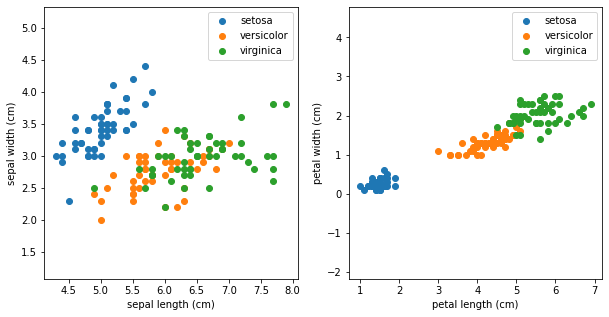

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
for contador, nome in enumerate(nomesAlvo):
    x_plot = dados[ alvos == contador]
    plt.plot(x_plot[:,0], x_plot[:,1], linestyle='none', marker='o', label=nome);

plt.xlabel(caracteristicas[0]);
plt.ylabel(caracteristicas[1]);
plt.axis('equal');
plt.legend();

plt.subplot(1, 2, 2)
for contador, nome in enumerate(nomesAlvo):
    x_plot = dados[ alvos == contador]
    plt.plot(x_plot[:,2], x_plot[:,3], linestyle='none', marker='o', label=nome);

plt.xlabel(caracteristicas[2]);
plt.ylabel(caracteristicas[3]);
plt.axis('equal');
plt.legend();



## Experimentando o Perceptron

2 entradas e 1 saída (1 LTU)

In [7]:
dadosReduzidos = dados[:,(2, 3)]
dadosReduzidos

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.4, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

In [8]:
alvos

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [9]:
classe = 0 # clase setosa
alvos == classe

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [10]:
alvosBinarios = (alvos == classe).astype(int)
alvosBinarios

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [11]:
from sklearn.linear_model import Perceptron

classificadorPerceptron = Perceptron()
classificadorPerceptron.fit(dadosReduzidos, alvosBinarios)

Perceptron()

In [12]:
classificadorPerceptron.score(dadosReduzidos, alvosBinarios)

1.0

In [13]:
classificadorPerceptron.coef_

array([[-0.7, -1.2]])

## 4 entradas e 3 saidas

In [14]:
classificadorPerceptron = Perceptron()
classificadorPerceptron.fit(dados, alvos)

Perceptron()

In [15]:
classificadorPerceptron.score(dados, alvos)

0.48

# Construir Redes Neurais

In [17]:
import tensorflow #é do Google
from tensorflow import keras

In [18]:
dados.shape

(150, 4)

In [19]:
len(caracteristicas)

4

In [20]:
caracteristicas

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [21]:
nomesAlvo

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [22]:
len(nomesAlvo)

3

In [24]:
qtd_saida=len(nomesAlvo)
qtd_entrada=len(caracteristicas)

In [25]:
dados[0]

array([5.1, 3.5, 1.4, 0.2])

In [27]:
from sklearn.preprocessing import StandardScaler
padronizador = StandardScaler()

In [28]:
dados_padronizados = padronizador.fit_transform(dados)

In [29]:
dados_padronizados[0]

array([-0.90068117,  1.01900435, -1.34022653, -1.3154443 ])

In [30]:
from sklearn.model_selection import train_test_split
dados_treino, dados_teste, alvos_treino, alvos_teste=train_test_split(dados_padronizados, alvos, test_size=0.33, random_state=42)

In [31]:
dados_treino.shape

(100, 4)

In [32]:
dados_teste.shape

(50, 4)

In [33]:
alvos_treino.shape

(100,)

In [34]:
modelo = keras.Sequential(
    [keras.layers.Input(qtd_entrada),
     keras.layers.Dense(qtd_saida, activation='softmax')     
    ])

In [35]:
type(modelo)

keras.engine.sequential.Sequential

outra forma de criar

In [36]:
modelo = keras.Sequential()
modelo.add(keras.layers.Input(4))
modelo.add(keras.layers.Dense(3, activation='softmax'))

In [37]:
type(modelo)

keras.engine.sequential.Sequential

##acrescentando a camada oculta

In [38]:
modelo = keras.Sequential()
modelo.add(keras.layers.Input(4))
modelo.add(keras.layers.Dense(4, activation='relu'))
modelo.add(keras.layers.Dense(3, activation='softmax'))

In [39]:
modelo.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 3)                 15        
                                                                 
Total params: 35
Trainable params: 35
Non-trainable params: 0
_________________________________________________________________


##compilando o modelo

In [41]:
modelo.compile(
    optimizer = keras.optimizers.SGD(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [42]:
historico = modelo.fit(dados_treino, alvos_treino, epochs=20, validation_split=0.2)

Epoch 1/20
3/3 [==============================] - 1s 94ms/step - loss: 1.1952 - accuracy: 0.2625 - val_loss: 1.3574 - val_accuracy: 0.1500
Epoch 2/20
3/3 [==============================] - 0s 14ms/step - loss: 1.1723 - accuracy: 0.3000 - val_loss: 1.3294 - val_accuracy: 0.2000
Epoch 3/20
3/3 [==============================] - 0s 15ms/step - loss: 1.1523 - accuracy: 0.3000 - val_loss: 1.3046 - val_accuracy: 0.2000
Epoch 4/20
3/3 [==============================] - 0s 12ms/step - loss: 1.1334 - accuracy: 0.3250 - val_loss: 1.2814 - val_accuracy: 0.2000
Epoch 5/20
3/3 [==============================] - 0s 12ms/step - loss: 1.1154 - accuracy: 0.3750 - val_loss: 1.2557 - val_accuracy: 0.2000
Epoch 6/20
3/3 [==============================] - 0s 12ms/step - loss: 1.0960 - accuracy: 0.4125 - val_loss: 1.2341 - val_accuracy: 0.2000
Epoch 7/20
3/3 [==============================] - 0s 12ms/step - loss: 1.0792 - accuracy: 0.4375 - val_loss: 1.2130 - val_accuracy: 0.2000
Epoch 8/20
3/3 [===========

In [43]:
perda_teste, acuracia_teste = modelo.evaluate(dados_teste, alvos_teste)

2/2 [==============================] - 0s 12ms/step - loss: 0.8154 - accuracy: 0.8400


In [44]:
print(acuracia_teste)

0.8399999737739563


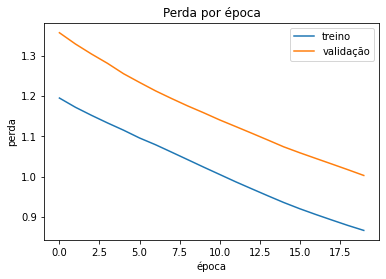

In [47]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por época')
plt.xlabel('época')
plt.ylabel('perda')
plt.legend(['treino','validação'])

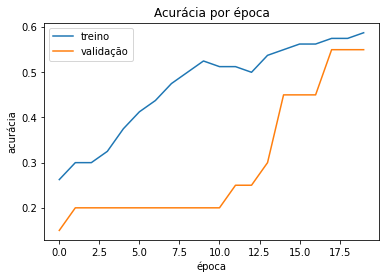

In [48]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por época')
plt.xlabel('época')
plt.ylabel('acurácia')
plt.legend(['treino','validação'])

##ajustar o modelo

In [55]:
modelo = keras.Sequential()
modelo.add(keras.layers.Input(4))
modelo.add(keras.layers.Dense(64, activation='relu'))
modelo.add(keras.layers.Dense(64, activation='relu'))
modelo.add(keras.layers.Dense(3, activation='softmax'))

In [50]:
modelo.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                320       
                                                                 
 dense_5 (Dense)             (None, 64)                4160      
                                                                 
 dense_6 (Dense)             (None, 3)                 195       
                                                                 
Total params: 4,675
Trainable params: 4,675
Non-trainable params: 0
_________________________________________________________________


In [56]:
modelo.compile(
    optimizer = keras.optimizers.SGD(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [57]:
historico = modelo.fit(dados_treino, alvos_treino, epochs=20, validation_split=0.2)

Epoch 1/20
3/3 [==============================] - 0s 82ms/step - loss: 1.2000 - accuracy: 0.1250 - val_loss: 1.1466 - val_accuracy: 0.2000
Epoch 2/20
3/3 [==============================] - 0s 16ms/step - loss: 1.1655 - accuracy: 0.2000 - val_loss: 1.1234 - val_accuracy: 0.3500
Epoch 3/20
3/3 [==============================] - 0s 13ms/step - loss: 1.1355 - accuracy: 0.2375 - val_loss: 1.0987 - val_accuracy: 0.3500
Epoch 4/20
3/3 [==============================] - 0s 14ms/step - loss: 1.1019 - accuracy: 0.2750 - val_loss: 1.0763 - val_accuracy: 0.4500
Epoch 5/20
3/3 [==============================] - 0s 14ms/step - loss: 1.0738 - accuracy: 0.3625 - val_loss: 1.0553 - val_accuracy: 0.6000
Epoch 6/20
3/3 [==============================] - 0s 13ms/step - loss: 1.0480 - accuracy: 0.5875 - val_loss: 1.0353 - val_accuracy: 0.6000
Epoch 7/20
3/3 [==============================] - 0s 12ms/step - loss: 1.0238 - accuracy: 0.6750 - val_loss: 1.0150 - val_accuracy: 0.6000
Epoch 8/20
3/3 [===========

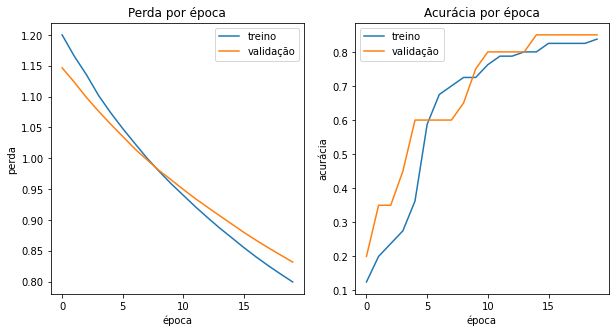

In [58]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por época')
plt.xlabel('época')
plt.ylabel('perda')
plt.legend(['treino','validação'])

plt.subplot(1,2,2)
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por época')
plt.xlabel('época')
plt.ylabel('acurácia')
plt.legend(['treino','validação'])

In [59]:
perda_teste, acuracia_teste = modelo.evaluate(dados_teste, alvos_teste)
print(acuracia_teste)

2/2 [==============================] - 0s 15ms/step - loss: 0.7600 - accuracy: 0.8000
0.800000011920929
